<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv("data.csv", encoding="gbk")

In [3]:
df.head(10)

,stu_id,time,course_index,name,type,type_id
0,0,2017/6/1 9:02,0,中国建筑史（上）,艺术·设计 历史,20.0
1,0,2017/7/4 7:52,1,外国工艺美术史,艺术·设计,20.0
2,0,2017/7/4 7:55,2,心理学概论,社科·法律,13.0
3,0,2017/7/20 5:35,3,经济学原理,经管·会计,10.0
4,0,2017/11/14 5:36,4,公司金融,经管·会计,10.0
5,0,2017/11/14 6:15,5,创业102：你能为客户做什么？,创业 经管·会计,1.0
6,0,2017/11/29 3:09,6,e时代的教与学――MOOC引发的混合式教学,教育,9.0
7,0,2018/3/21 7:25,7,党的十九大精神概论,社科·法律,13.0
8,1,2016/12/21 12:09,8,e时代的大佬师——慕课教师的修炼心法,教育,9.0
9,1,2017/1/5 8:05,9,大学物理近代物理,物理,18.0


# the number of each feature

In [4]:
df.nunique()

stu_id           82535
time            295658
course_index      1302
name              1302
type                79
type_id             23
dtype: int64

# the distribution of user's chosen courses

,stu_id,coursenum
count,82535.000000,82535.000000
mean,41267.000000,5.554650
std,23825.946571,5.657158
min,0.000000,3.000000
25%,20633.500000,3.000000
50%,41267.000000,4.000000
75%,61900.500000,6.000000
max,82534.000000,398.000000


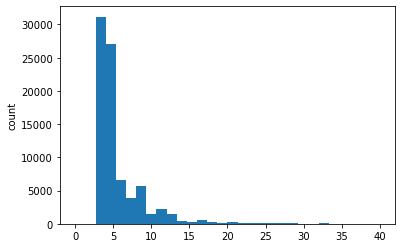

In [5]:
df_coursecount = df.groupby("stu_id").size().reset_index(name='coursenum')
plt.hist(df_coursecount["coursenum"], 30, range=[0, 40])
plt.ylabel('count')  
df_coursecount.describe()

# the distribution of user's chosen type

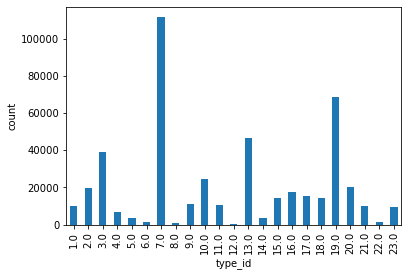

In [6]:
df.groupby("type_id").size().plot(kind='bar')
plt.ylabel('count') 

plt.show()

In [7]:
df.groupby("type_id").size().reset_index(name='chosen_times').sort_values('chosen_times', ascending = False)

,type_id,chosen_times
6,7.0,111542
18,19.0,68895
12,13.0,46372
2,3.0,38911
9,10.0,24394
19,20.0,20185
1,2.0,19840
15,16.0,17659
16,17.0,15163
17,18.0,14531


In [8]:
df[df['type_id']==18]

,stu_id,time,course_index,name,type,type_id
9,1,2017/1/5 8:05,9,大学物理近代物理,物理,18.0
21,2,2017/8/21 7:54,9,大学物理近代物理,物理,18.0
45,7,2017/1/7 23:43,32,量子力学（上）,物理,18.0
52,8,2017/9/24 5:41,32,量子力学（上）,物理,18.0
223,38,2018/3/20 14:31,32,量子力学（上）,物理,18.0
...,...,...,...,...,...,...
458255,82517,2017/12/29 11:22,32,量子力学（上）,物理,18.0
458256,82517,2017/12/29 11:34,229,大学物理1 (力学、热学),物理,18.0
458291,82522,2017/12/29 14:42,357,大学物理2 (电磁学、光学和量子物理),物理,18.0
458385,82528,2018/1/21 9:48,206,光电仪器设计,物理,18.0


# the distribution of user's chosen type

,stu_id,typenum
count,82535.000000,82535.000000
mean,41267.000000,2.889659
std,23825.946571,1.872056
min,0.000000,1.000000
25%,20633.500000,2.000000
50%,41267.000000,3.000000
75%,61900.500000,3.000000
max,82534.000000,21.000000


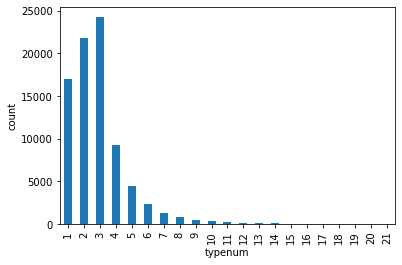

In [9]:
df_typecount = df.groupby("stu_id")['type_id'].nunique().reset_index(name='typenum')
df_typecount.groupby(["typenum"]).size().plot(kind='bar')
plt.ylabel('count')  
df_typecount.describe()

# the most popular courses

In [10]:
top_course = df[["course_index","name","type","type_id"]]
top_course['choosen_times'] = top_course.groupby("course_index").size()
top_course = top_course.sort_values('choosen_times', ascending = False)
top_course.head(20)

,course_index,name,type,type_id,choosen_times
17,17,数据结构（上）,计算机,7.0,11058.0
14,14,C++语言程序设计基础,计算机,7.0,9050.0
10,10,计算机科学和Python编程导论,计算机,7.0,8292.0
214,26,网络技术与应用,计算机,7.0,8096.0
18,18,操作系统,计算机,7.0,6874.0
367,191,运营概论（微慕课）,工程 经管·会计,3.0,5949.0
15,15,生活英语听说,外语,16.0,5901.0
732,290,网络、群体与市场,计算机,7.0,5726.0
943,148,面向对象程序设计（C++）,计算机,7.0,5699.0
942,17,数据结构（上）,计算机,7.0,5684.0
